In [1]:
import os
import matplotlib.gridspec as gridspec
import cv2
import read_dataset as data
import hough_circles as hough
import visualization as vis
import numpy as np
from PIL import Image
import math
import copy
from PIL import ImageEnhance

## Load dataset

In [321]:
m=8
root="/home/manthan/irisDetection/IITD Database/00"+str(m)
#root = "/home/manthan/Desktop/IrisRecognition-master/MMU/45"

In [322]:
os.path.exists(root)


True

In [323]:
#images = data.read_dataset(root, "bmp")
images = []
file_names = []
for file in os.listdir(root):
    title = file.title().lower()
    if title.split('.')[-1] == "bmp":
        file_names.append(title)
        images.append(np.array(Image.open(root+'/'+file),dtype='uint8'))

In [324]:
len(images)

10

In [325]:
images[0].shape

(240, 320, 3)

## Detect and draw inner circles

In [326]:
circles=[]
for img in images:
    circle = hough.detect_inner_circle(img)
    circles.append(circle)
    cv2.circle(img,(circle[0],circle[1]),circle[2],(0,255,0),2)
    cv2.circle(img,(circle[0],circle[1]),2,(0,255,0),3)

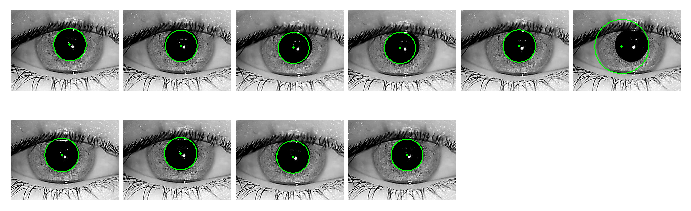

In [327]:
vis.plot_images_grid(images[:len(images)], 5, 6)

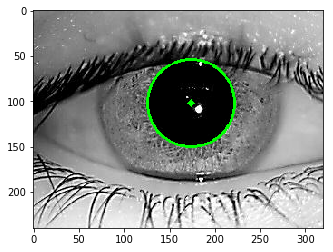

In [328]:
import matplotlib.pyplot as plt
plt.imshow(images[0])

[[174, 102, 48], [172, 106, 47], [170, 112, 46], [154, 112, 46], [172, 106, 48], [144, 108, 80], [150, 106, 50], [170, 102, 48], [168, 112, 48], [174, 106, 47]]
48
[[174, 102, 96], [172, 106, 94], [170, 112, 92], [154, 112, 92], [172, 106, 96], [174, 102, 96], [150, 106, 100], [170, 102, 96], [168, 112, 96], [174, 106, 94]]


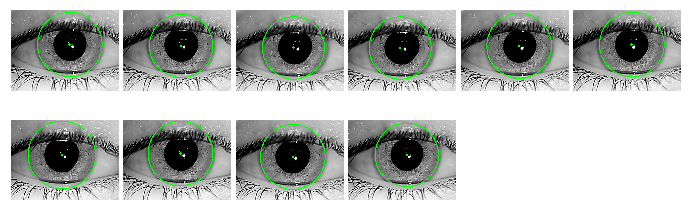

In [329]:
images = []
file_names = []
for file in os.listdir(root):
    title = file.title().lower()
    if title.split('.')[-1] == "bmp":
        file_names.append(title)
        images.append(np.array(Image.open(root+'/'+file),dtype='uint8'))

print(circles)
meanx=0
meany=0
meanr=0

count=0

for i in range(len(circles)):
    if(circles[i][2]<=(images[i].shape[0]+images[i].shape[1])/15):
        count=count+1
        meanx=meanx+circles[i][0]
        meany=meany+circles[i][1]
        meanr=meanr+circles[i][2]
if(count!=0):
    meanx=meanx/(count)
    meany=meany/(count)
    meanr=meanr/(count)
else:
    meanx=circles[0][0]
    meany=circles[0][1]
    meanr=circles[0][2]

print(meanr)


for i in range(len(circles)):
    if(circles[i][2]>=(images[i].shape[0]+images[i].shape[1])/10):
        circles[i][0]=meanx
        circles[i][1]=meany
        circles[i][2]=meanr

for i in range(len(circles)):
    circles[i][2]=int(circles[i][2]*2)
    
print(circles)

for i in range(len(images)):
    img=images[i]
    cv2.circle(img,(circles[i][0],circles[i][1]),circles[i][2],(0,255,0),2)
    cv2.circle(img,(circles[i][0],circles[i][1]),2,(0,255,0),3)
    
vis.plot_images_grid(images[:len(images)], 5, 6)

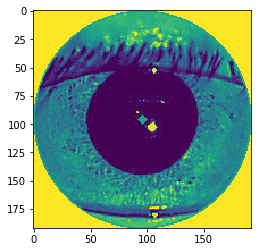

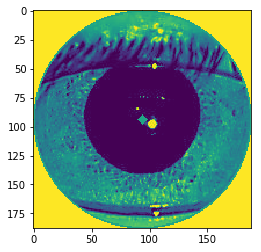

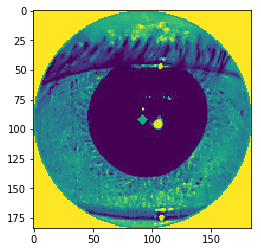

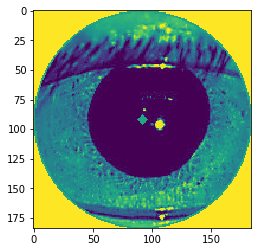

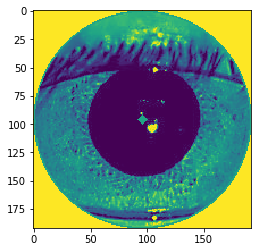

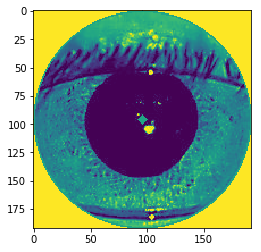

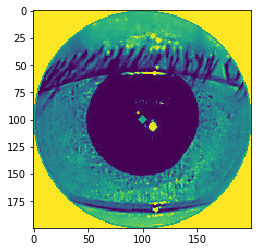

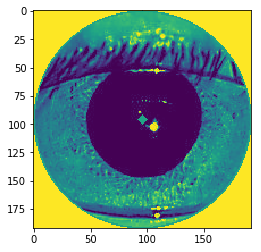

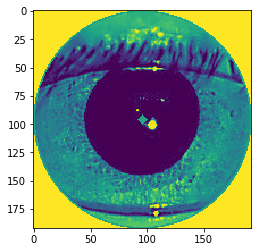

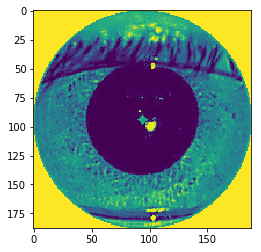

In [330]:
images=np.array(images)
os.mkdir('croppedimg/'+str(m))
for i in range(len(images)):
    canvas=np.full(images.shape[1:],255)
    for j in range(images.shape[1]):
        for k in range(images.shape[2]):
            d=math.sqrt(math.pow((k-circles[i][0]),2)+math.pow((j-circles[i][1]),2))
            if(abs(d)<=circles[i][2]):
                canvas[j][k][0]=images[i][j][k][0]
                canvas[j][k][1]=images[i][j][k][1]
                canvas[j][k][2]=images[i][j][k][2]
    newcanvas=np.full((2*circles[i][2],2*circles[i][2],3),255)
    a=circles[i][0]-circles[i][2]
    b=circles[i][1]-circles[i][2]
    for j in range(2*circles[i][2]):
        for k in range(2*circles[i][2]):
            newcanvas[j][k][0]=canvas[b+j][a+k][0]
            newcanvas[j][k][1]=canvas[b+j][a+k][1]
            newcanvas[j][k][2]=canvas[b+j][a+k][2]
    newcanvas=newcanvas.astype('uint8')     
    newcanvas=cv2.cvtColor(newcanvas,cv2.COLOR_BGR2GRAY)
     
    plt.imshow(newcanvas)
    plt.show()
    newcanvas=Image.fromarray(newcanvas)
    newcanvas=newcanvas.resize((50,50))
    newcanvas.save('croppedimg/'+str(m)+'/result'+str(i)+'.jpg')
                

In [331]:
os.mkdir('transformed/'+str(m))
for i in range(len(images)):
    os.system('convert  croppedimg/'+str(m)+'/result'+str(i)+'.jpg +distort DePolar 0 transformed/'+str(m)+'/resultpolar'+str(i)+'.jpg')

In [332]:
factor1=1.5
factor2=2.0
os.mkdir('enhanced/'+str(m))
for i in range(len(images)):
    image=Image.open('transformed/'+str(m)+'/resultpolar'+str(i)+'.jpg')
    image=image.crop((5,12,70,25))
    enhancer = ImageEnhance.Sharpness(image)
    enhancedimg=enhancer.enhance(factor1).save('enhanced/'+str(m)+'/enhanced'+str(i)+'.jpg')
    image=Image.open('enhanced/'+str(m)+'/enhanced'+str(i)+'.jpg')
    enhancedimg = ImageEnhance.Contrast(image)
    enhancedimg=enhancer.enhance(factor2).save('enhanced/'+str(m)+'/enhanced'+str(i)+'.jpg')
    image=np.array(image)

#     

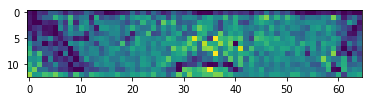

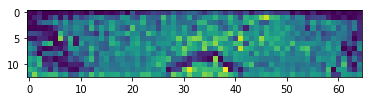

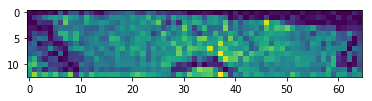

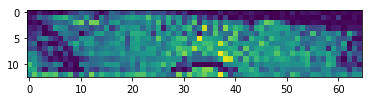

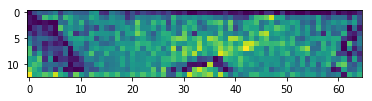

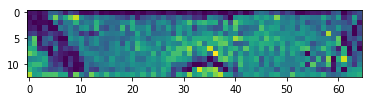

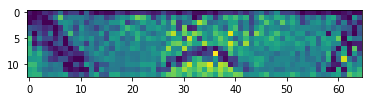

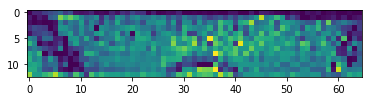

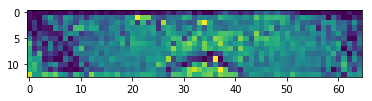

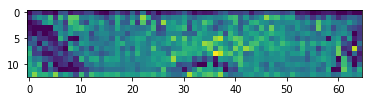

In [333]:
os.mkdir('featured/'+str(m))
for i in range(len(images)):
    enhancedimg=Image.open('enhanced/'+str(m)+'/enhanced'+str(i)+'.jpg')
    imagesharp=np.array(enhancedimg)
    kernel = np.array([[-1,-1,-1], 
                       [-1, 31,-1],
                       [-1,-1,-1]])

    sharpened = cv2.filter2D(imagesharp, -1, kernel) # applying the sharpening kernel to the input image & displaying it.
    plt.imshow(imagesharp)
    plt.show()
    temp1=Image.fromarray(imagesharp)
    temp1.save('featured/'+str(m)+'/feature_'+str(i)+'1.jpg')
    imagesharp=cv2.bitwise_not(imagesharp)
    temp2=Image.fromarray(imagesharp)
    temp2.save('featured/'+str(m)+'/feature2_'+str(i)+'.jpg')

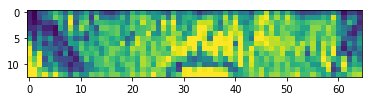

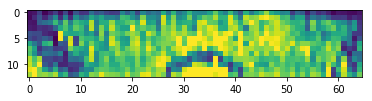

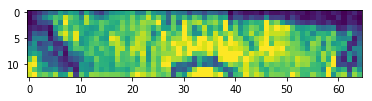

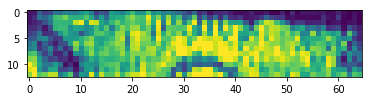

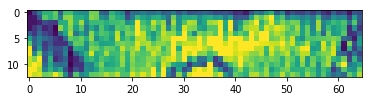

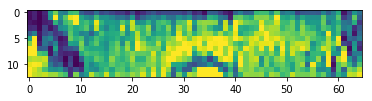

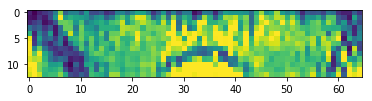

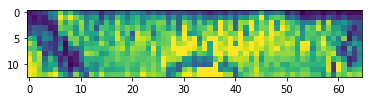

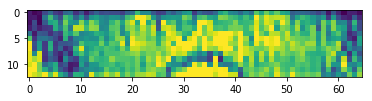

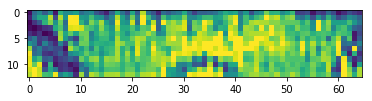

In [334]:
os.mkdir('temp/'+str(m))
for i in range(len(images)):
    imagesharp=Image.open('featured/'+str(m)+'/feature_'+str(i)+'1.jpg')
    imagesharp=np.array(imagesharp,dtype='uint8')
    g_kernel = cv2.getGaborKernel((30,30), 0.30, np.pi*20, 1.0, .47, 0, ktype=cv2.CV_32F)

    filtered_img = cv2.filter2D(imagesharp, cv2.CV_8UC3, g_kernel)

    plt.imshow(filtered_img)
    plt.show()
    filtered_img=Image.fromarray(filtered_img)
    filtered_img=filtered_img.resize((50,50))
    filtered_img.save('temp/'+str(m)+'/test'+str(i)+'.jpg')
  


In [335]:
os.mkdir('final/'+str(m))
for i in range(len(images)):
    m1= Image.open('temp/'+str(m)+'/test'+str(i)+'.jpg')
    m1=np.array(m1)

    kernel = np.array([[-1,-1,-1], 
                       [-1, 11,-1],
                       [-1,-1,-1]])

    sharpened = cv2.filter2D(m1, -1, kernel) # applying the sharpening kernel to the input image & displaying it.

    #m1=cv2.bitwise_not(m1)
    m1.astype('uint8')
    m1=Image.fromarray(m1)
    m1.save('final/'+str(m)+'/final'+str(i)+'.jpg')
   

In [111]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random

print(tf.__version__)


1.5.0


In [363]:
data = []
file_names = []
print (os.path.exists('final/4'))
for file in os.listdir('final/4'):
    data.append([(np.array(Image.open('final/4/'+file),dtype='uint8')),1])

print (os.path.exists('final/8'))
for file in os.listdir('final/8'):
    data.append([(np.array(Image.open('final/8/'+file),dtype='uint8')),0])
data=np.array(data)

True
True


In [364]:
data[10][0].shape

(50, 50)

In [365]:
np.random.shuffle(data)
np.random.shuffle(data)
np.random.shuffle(data)

In [366]:
data=data/255

In [367]:
xtrain=[]
ytrain=[]
ytest=[]
xtest=[]
for i in range(0,int(data.shape[0]*0.8)):
    xtrain.append(data[i][0])
    ytrain.append(data[i][1]*255)
    
for i in range(int(data.shape[0]*0.8),data.shape[0]):
    xtest.append(data[i][0])
    ytest.append(data[i][1]*255)
    
xtest=np.array(xtest)
xtrain=np.array(xtrain)
ytest=np.array(ytest)
ytrain=np.array(ytrain)
    

In [368]:
print(xtrain.shape)
print(xtest.shape)


(16, 50, 50)
(4, 50, 50)


In [369]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1]*xtrain.shape[2])
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1]*xtest.shape[2])

In [370]:
xtrain.shape

(16, 2500)

In [371]:
from sklearn import svm, linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(xtrain,ytrain)
clf=svm.SVC()
clf.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [381]:
print(reg.score(xtrain,ytrain))
print(clf.score(xtrain,ytrain))

print(reg.score(xtest,ytest))
print(clf.score(xtest,ytest))

1.0
1.0
0.9931759012760693
1.0


In [382]:
print(reg.predict(xtest))
print(clf.predict(xtest))
print(ytest)

[0.94020318 0.00788585 0.05279309 0.98002145]
[1. 0. 0. 1.]
[1. 0. 0. 1.]


In [421]:
xtrain=[]
ytrain=[]
ytest=[]
xtest=[]
for i in range(0,int(data.shape[0]*0.8)):
    xtrain.append(data[i][0])
    ytrain.append(data[i][1]*250)
    
for i in range(int(data.shape[0]*0.8),data.shape[0]):
    xtest.append(data[i][0])
    ytest.append(data[i][1]*250)
    
xtest=np.array(xtest)
xtrain=np.array(xtrain)
ytest=np.array(ytest)
ytrain=np.array(ytrain)

print(xtrain.shape)
print(xtest.shape)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(xtrain.shape[1], xtrain.shape[2])),
    keras.layers.Dense(, activation=tf.nn.sigmoid),
    keras.layers.Dense(1, activation=tf.nn.relu)
])


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=5)


test_loss, test_acc = model.evaluate(xtest, ytest)

print('Test accuracy:', test_acc)




(16, 50, 50)
(4, 50, 50)
Epoch 1/5
16/16 [==============================]16/16 [==============================] - 2s 119ms/step - loss: 0.0000e+00 - acc: 0.5000

Epoch 2/5
16/16 [==============================]16/16 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - acc: 0.5000

Epoch 3/5
16/16 [==============================]16/16 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - acc: 0.5000

Epoch 4/5
16/16 [==============================]16/16 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - acc: 0.5000

Epoch 5/5
16/16 [==============================]16/16 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - acc: 0.5000

4/4 [==============================]4/4 [==============================] - 1s 182ms/step

Test accuracy: 0.5


In [422]:
print(model.predict(xtest))
print(ytest)

[[0.]
 [0.]
 [0.]
 [0.]]
[0.98039216 0.         0.         0.98039216]


In [312]:
ytrain

array([0.98039216, 0.        , 0.98039216, 0.        , 0.98039216,
       0.98039216, 0.        , 0.        , 0.        , 0.98039216,
       0.        , 0.        , 0.        , 0.98039216, 0.98039216,
       0.98039216])